In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


In [2]:
# We download a dataset called new-york city airbnb and we read it
import pandas as pd
import numpy as np
data= pd.read_csv('/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')
print (data)

             id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_grou

In [3]:
#After reading the dataset, we explore the data (EDA)
print (data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
print (data.head())
print (data.tail())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [5]:
print (data.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [6]:
#5 number summary
print (data.describe().loc[['min', '25%', '50%', '75%', 'max']])

             id      host_id   latitude  longitude    price  minimum_nights  \
min      2539.0       2438.0  40.499790 -74.244420      0.0             1.0   
25%   9471945.0    7822033.0  40.690100 -73.983070     69.0             1.0   
50%  19677284.0   30793816.0  40.723070 -73.955680    106.0             3.0   
75%  29152178.5  107434423.0  40.763115 -73.936275    175.0             5.0   
max  36487245.0  274321313.0  40.913060 -73.712990  10000.0          1250.0   

     number_of_reviews  reviews_per_month  calculated_host_listings_count  \
min                0.0               0.01                             1.0   
25%                1.0               0.19                             1.0   
50%                5.0               0.72                             1.0   
75%               24.0               2.02                             2.0   
max              629.0              58.50                           327.0   

     availability_365  
min               0.0  
25%           

In [7]:
#We will now move on to Outliers
#To find Outliers using the IQR method
def find_outlier_columns (data, k=1.5):
    outlier_columns= []
    for column in data.columns:
        if data[column].dtype!= 'object':
            q1= data[column].quantile(0.25)
            q3= data[column].quantile(0.75)
            IQR= q3-q1
            Lower_Bound= q1-(k*IQR)
            Upper_Bound=q3+(k*IQR)
            outliers= data[(data[column]>Upper_Bound) | (data[column]<Lower_Bound)]
            if len(outliers)>0:
                outlier_columns.append(column)
    return outlier_columns
oc= find_outlier_columns(data) 
print (oc)

['host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']


In [8]:
#Now we will remove these outliers
def remove_outliers_iqr (data, column_name, k=1.5):
    q1= data[column_name].quantile(0.25)
    q3= data[column_name].quantile(0.75)
    IQR= q3- q1
    lower_bound= q1-(k*IQR)
    upper_bound= q3+(k*IQR)
    data= data[(data[column_name]>=lower_bound) & (data[column_name]<=upper_bound)]
    return data
data= remove_outliers_iqr( data, 'host_id')
data= remove_outliers_iqr( data, 'latitude')
data= remove_outliers_iqr( data, 'longitude')
data= remove_outliers_iqr( data, 'price')
data= remove_outliers_iqr( data, 'minimum_nights')
data= remove_outliers_iqr( data, 'number_of_reviews')
data= remove_outliers_iqr( data, 'reviews_per_month')
data= remove_outliers_iqr( data, 'calculated_host_listings_count') #doubt

In [9]:
#finding missing values
print (data.isnull().sum())

id                                0
name                              6
host_id                           0
host_name                         7
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [10]:
#we find out that there are some missing datas in certain columns
# the columns are- name,host_name,last review and reviews per month
#Finding the mean and median of the columns
print (data.mean())
print (data.median())



id                                1.771937e+07
host_id                           5.140507e+07
latitude                          4.072873e+01
longitude                        -7.395731e+01
price                             1.219184e+02
minimum_nights                    2.829271e+00
number_of_reviews                 1.381965e+01
reviews_per_month                 7.631539e-01
calculated_host_listings_count    1.273506e+00
availability_365                  7.107620e+01
dtype: float64
id                                1.852202e+07
host_id                           2.325637e+07
latitude                          4.072039e+01
longitude                        -7.395557e+01
price                             1.000000e+02
minimum_nights                    2.000000e+00
number_of_reviews                 7.000000e+00
reviews_per_month                 4.200000e-01
calculated_host_listings_count    1.000000e+00
availability_365                  2.000000e+00
dtype: float64


/tmp/ipykernel_32/354705786.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print (data.mean())
/tmp/ipykernel_32/354705786.py:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print (data.median())


In [11]:
#finding the modes
print (data['name'].value_counts())
print (data['host_name'].value_counts())
print (data['last_review'].value_counts())


Home away from home                         7
Cozy Brooklyn Apartment                     7
Brooklyn Apartment                          7
Private Room                                6
New york Multi-unit building                6
                                           ..
Lrg sunny aprtmt, UWS/Central Park          1
QUIET CLEAN APT IN THE HEART OF IT ALL 4    1
Sunny Studio Apartment in Ridgewood         1
Private Bedroom, Bath & Living room         1
Cozy Private Room in Bushwick, Brooklyn     1
Name: name, Length: 21532, dtype: int64
Michael     192
David       170
Sarah       142
Daniel      116
Alex        114
           ... 
Ljubenka      1
Yarynka       1
Lb            1
Sava          1
Rusaa         1
Name: host_name, Length: 6957, dtype: int64
2019-06-23    597
2019-06-30    594
2019-07-01    574
2019-01-01    302
2019-06-24    293
             ... 
2014-09-14      1
2014-09-18      1
2014-10-17      1
2014-08-30      1
2019-02-05      1
Name: last_review, Length: 1682, dty

In [12]:
#Since the mode of airbnb names is "Hillside Hotel"
#We will fill the NA values of this columns with the mode
missing_values = data['name'].isnull()
fill_value = 'Hillside Hotel'  
data['name'].fillna(fill_value, inplace=True)


In [13]:
#and the mode of the host_names is Michael
#We will fill the NA values of this columns with the mode
missingv= data['host_name'].isnull()
replacementv= 'Michael'
data['host_name'].fillna(replacementv, inplace= True)


In [14]:
#and the mode of last_review is 2019-06-23
#We will fill the NA values of this columns with the mode
missing= data['last_review'].isnull()
replace= '2019-06-23'
data['last_review'].fillna(replace, inplace= True)

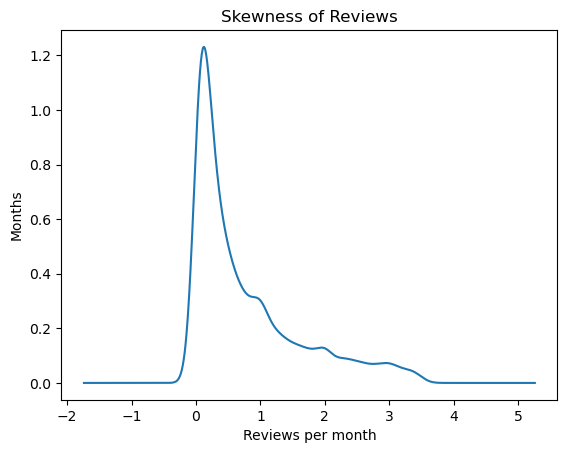

In [15]:
#since the last column has numerical data, we will replace the NA with median
# First let's check the skewness of this column before the cleaning treatment
import matplotlib.pyplot as plt
data['reviews_per_month'].plot.density()
plt.xlabel("Reviews per month")
plt.ylabel("Months")
plt.title("Skewness of Reviews")
plt.show()


In [16]:
#finding the median 
Median= data['reviews_per_month'].median()
missingval= data['reviews_per_month'].isnull()
data['reviews_per_month'].fillna(Median, inplace= True)


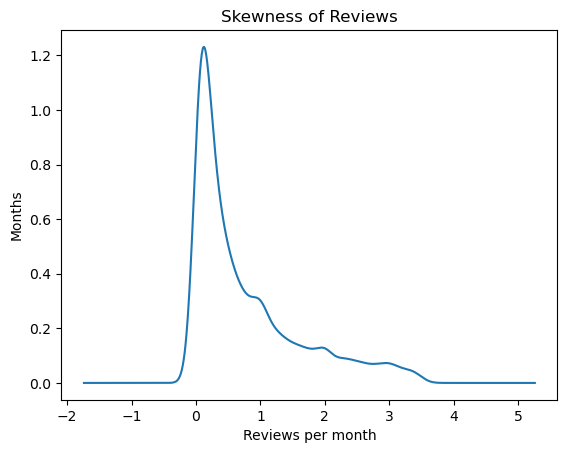

In [17]:
data['reviews_per_month'].plot.density()
plt.xlabel("Reviews per month")
plt.ylabel("Months")
plt.title("Skewness of Reviews")
plt.show()
#We can see that the skewness of the column remains the same even after replacing the missing values with the median

In [18]:
print (data.isnull().sum())
#Hence completing the treatment of Missing values

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [19]:
#for count of duplicates
duplicate_counts= data.duplicated().sum()
print (duplicate_counts)

0


In [20]:
#Calculate the correlation matrix
#Finding correlations help us decide whether we should find the linear regression
corr_matrix = data.corr()
print ('Correlation matrix:')
print (corr_matrix)

Correlation matrix:
                                      id   host_id  latitude  longitude  \
id                              1.000000  0.482759 -0.009978   0.104280   
host_id                         0.482759  1.000000  0.040095   0.126398   
latitude                       -0.009978  0.040095  1.000000   0.116241   
longitude                       0.104280  0.126398  0.116241   1.000000   
price                          -0.036901 -0.058111  0.050526  -0.386350   
minimum_nights                 -0.092447 -0.113315 -0.017322  -0.065767   
number_of_reviews              -0.230332 -0.054139 -0.004863   0.029036   
reviews_per_month               0.448510  0.308704 -0.012329   0.091250   
calculated_host_listings_count  0.075373  0.073841 -0.030190   0.123467   
availability_365                0.013923  0.126183 -0.022602   0.130501   

                                   price  minimum_nights  number_of_reviews  \
id                             -0.036901       -0.092447          -0.230332

/tmp/ipykernel_32/2431784059.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


In [21]:
from sklearn.linear_model import LinearRegression
# Select the variables for linear regression
X = data[['price']] #Predictor variable (x)
y = data[['minimum_nights']] #Target variable (y)

# Fill missing values in X with the mean
X_filled = X.fillna(X.mean())

# Create a linear regression model
model = LinearRegression()

# Fit the model to the filled data
model.fit(X_filled, y)

# Print the model summary
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

# Retrieve the coefficient and intercept of the linear equation
coefficient = model.coef_[0][0]
intercept = model.intercept_[0]

# Print the linear equation
print("Linear Equation: y =", coefficient, "* x +", intercept)

Model Coefficients: [[0.00179937]]
Model Intercept: [2.60989471]
Linear Equation: y = 0.001799366031262429 * x + 2.6098947136371233


In [22]:
#Calculate the correlation matrix
corr_matrix = data.corr()
print ('Correlation matrix:')
print (corr_matrix)

Correlation matrix:
                                      id   host_id  latitude  longitude  \
id                              1.000000  0.482759 -0.009978   0.104280   
host_id                         0.482759  1.000000  0.040095   0.126398   
latitude                       -0.009978  0.040095  1.000000   0.116241   
longitude                       0.104280  0.126398  0.116241   1.000000   
price                          -0.036901 -0.058111  0.050526  -0.386350   
minimum_nights                 -0.092447 -0.113315 -0.017322  -0.065767   
number_of_reviews              -0.230332 -0.054139 -0.004863   0.029036   
reviews_per_month               0.448510  0.308704 -0.012329   0.091250   
calculated_host_listings_count  0.075373  0.073841 -0.030190   0.123467   
availability_365                0.013923  0.126183 -0.022602   0.130501   

                                   price  minimum_nights  number_of_reviews  \
id                             -0.036901       -0.092447          -0.230332

/tmp/ipykernel_32/1865117859.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


In [23]:
#Make Predictions
y_pred= model.predict(X_filled)
print (y_pred)

[[3.01475207]
 [2.85280913]
 [3.14790516]
 ...
 [2.87979962]
 [2.84201293]
 [2.66387569]]


In [24]:
from sklearn.metrics import r2_score, mean_squared_error
#Calculate r square
r2= r2_score (y, y_pred) #should be very high
#Calculate mean_squared_error
mse= mean_squared_error (y, y_pred) #should be very low

In [25]:
#Print r2_score and mse
print ('R_Squared:', r2)
print ('Mean_Squared_Error:', mse)

R_Squared: 0.004902681544325493
Mean_Squared_Error: 2.8662788808742152


Based on the results of correlation matrix which shows linear dependence and the r2 and the mse values show that these columns are not suitable for regression analysis.


In [26]:
#Now we will run queries on this data
data_filtered1= data.query('minimum_nights<3')
print (data_filtered1.head())

       id                                        name  host_id  \
1    2595                       Skylit Midtown Castle     2845   
25   8505          Sunny Bedroom Across Prospect Park    25326   
60  15385                       Very, very cozy place    60252   
62  15711  2 bedroom - Upper East Side-great for kids    61491   
73  17693             HARLEM, NEW YORK WELCOMES YOU!!    68428   

          host_name neighbourhood_group       neighbourhood  latitude  \
1          Jennifer           Manhattan             Midtown  40.75362   
25          Gregory            Brooklyn     Windsor Terrace  40.65599   
60         Cristina            Brooklyn        Williamsburg  40.71185   
62                D           Manhattan     Upper East Side  40.77065   
73  Tye And Etienne           Manhattan  Washington Heights  40.83139   

    longitude        room_type  price  minimum_nights  number_of_reviews  \
1   -73.98377  Entire home/apt    225               1                 45   
25  -73.9751

In [27]:
#filtering by multiple conditions using logical operators
data_filtered2= data.query("minimum_nights<3 and room_type== 'Private room'")
print (data_filtered2)
#doubt

             id                                             name    host_id  \
25         8505               Sunny Bedroom Across Prospect Park      25326   
60        15385                            Very, very cozy place      60252   
73        17693                  HARLEM, NEW YORK WELCOMES YOU!!      68428   
88        20300                           Great Location for NYC      76627   
97        21644                        Upper Manhattan, New York      82685   
...         ...                                              ...        ...   
48532  36310268                                   Full size room  171482981   
48576  36318560  Luxury Sun-filled Private Room near Time Square   52917571   
48615  36344079                     The Little Castle in Astoria    3867848   
48782  36425863       Lovely Privet Bedroom with Privet Restroom   83554966   
48852  36455809          Cozy Private Room in Bushwick, Brooklyn   74162901   

             host_name neighbourhood_group       ne

In [28]:
data_advance= data.query('(price<100) and minimum_nights == "1" and room_type== "Private room"')
print (data_advance.head())
#doubt

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []


In [29]:
#Filtering using a variable
minimum= 30
data_filtered4= data.query('minimum_nights> @minimum') #@ the variable
print (data_filtered4.head())

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []


In [30]:
#Filtering using string operations
data_filtered3= data.query('neighbourhood.str.contains("Upper East Side")', engine='python')
print(data_filtered3.head())

         id                                             name  host_id  \
62    15711       2 bedroom - Upper East Side-great for kids    61491   
126   28907              Garden studio in the Upper East Sid   124352   
164   40453  Charming & Cozy midtown loft any WEEK ENDS  !!!   174025   
376  112359                UES Quiet & Spacious 1 bdrm for 4   571952   
523  190267              Large Luxury Upper East Side Studio   918866   

    host_name neighbourhood_group    neighbourhood  latitude  longitude  \
62          D           Manhattan  Upper East Side  40.77065  -73.95269   
126      Lisa           Manhattan  Upper East Side  40.77800  -73.94822   
164    Sylvia           Manhattan  Upper East Side  40.76123  -73.96420   
376    Olivia           Manhattan  Upper East Side  40.78491  -73.95080   
523    Marina           Manhattan  Upper East Side  40.76684  -73.95944   

           room_type  price  minimum_nights  number_of_reviews last_review  \
62   Entire home/apt    250     

In [31]:
#Slicing
data_filtered= data[data['price']<100] #Filter prices lower than 100
data_filtered[['name', 'neighbourhood', 'neighbourhood_group', 'price']]

,name,neighbourhood,neighbourhood_group,price
25,Sunny Bedroom Across Prospect Park,Windsor Terrace,Brooklyn,60
60,"Very, very cozy place",Williamsburg,Brooklyn,80
64,Double Room w Private Deck Clinton Hill Best Area,Clinton Hill,Brooklyn,55
72,Cool Room in Hell's Kitchen,Hell's Kitchen,Manhattan,51
73,"HARLEM, NEW YORK WELCOMES YOU!!",Washington Heights,Manhattan,65
...,...,...,...,...
48331,Large Sunny Room Available,East Harlem,Manhattan,59
48394,READY BED GO the goal is to make u feel at home,Cypress Hills,Brooklyn,75
48404,Chic Room in Williamsburg + Backyard +Washer D...,Williamsburg,Brooklyn,91
48532,Full size room,Maspeth,Queens,65


In [32]:
#group by and aggregation
data_grouped= data.groupby('neighbourhood_group').agg({'price':'mean', 'name': 'count'})
print (data_grouped)

                          price   name
neighbourhood_group                   
Bronx                 72.970370    270
Brooklyn             108.537410  10318
Manhattan            142.811939   9582
Queens                92.340992   1654


In [33]:
#Filtering rows based on a list of values in a column
neighbourhood_to_filter= ['Upper West Side']
data_filtered_list= data[data['neighbourhood'].isin(neighbourhood_to_filter)]
print (data_filtered_list.head()) 

         id                                             name  host_id  \
10     5295                 Beautiful 1br on Upper West Side     7702   
117   27006  Comfortable UWS 2-BD Family-Friendly Brownstone   115560   
122   27759                   apartment next to Central park   119900   
239   60794               Bright and spacious, garden below!   293394   
372  107895                  Riverside Charm with Fire Place  3088389   

    host_name neighbourhood_group    neighbourhood  latitude  longitude  \
10       Lena           Manhattan  Upper West Side  40.80316  -73.96545   
117     Stacy           Manhattan  Upper West Side  40.77823  -73.97637   
122    Sylvie           Manhattan  Upper West Side  40.77842  -73.97556   
239    Rachel           Manhattan  Upper West Side  40.80021  -73.96071   
372       Kai           Manhattan  Upper West Side  40.77944  -73.98567   

           room_type  price  minimum_nights  number_of_reviews last_review  \
10   Entire home/apt    135     

In [34]:
#selecting the top 20 rows with the highest values in a column
top_20= data.nlargest(20, 'price')
print (top_20)

             id                                               name    host_id  \
46641  35353949   Spacious Two Bedroom-Prime Manhattan Midtown Loc   17689167   
44635  34335188       ✴ Brand New & Quiet ✴ East Village ✴ 2BR Apt  221634296   
44917  34471524        Brand New & Clean  Lower East Side  2BR Apt  159014432   
1823     815045                   Stylish West VILLAGE Water Views    4281957   
3627    2172139                 Modern Apt Steps from Central Park   10096792   
8490    6534409                    Unbelievable NYC Apt Avail Nov!   34174768   
20014  16023497    Huge Duplex in the Heart of Brownstone Brooklyn    1447642   
2004     883517                      3 Bedroom Upper West Side Gem    4677362   
29625  22748332              Luxury Home in the Heart of Manhattan     891403   
12262   9488285                                  J&D Vacation Home   49177258   
19462  15528972  2 Bedroom in Upper West right next to Central ...   99865195   
35414  28100131        When 

In [35]:
#selecting the smallest 20 rows based on a column
top_20= data.nsmallest(20, 'price')
print (top_20)


             id                                               name    host_id  \
25753  20608117                    Sunny, Quiet Room in Greenpoint    1641537   
25778  20624541      Modern apartment in the heart of Williamsburg   10132166   
22287  17979764                                            Jen Apt   84497333   
23256  18835820             Quiet, Cozy UES Studio Near the Subway   52777892   
24100  19415314  Girls only, cozy room one block from Times Square   47336995   
31066  24114389    Very Spacious bedroom, steps from CENTRAL PARK.  180661875   
31407  24412104                           Cozy feel at home studio   91034542   
32810  25839759  Gigantic Sunny Room in Park Slope-Private Back...  167570251   
35601  28270998       Charming, bright and brand new Bed-Stuy home     647528   
28019  21893604            Private Bedroom in West Village/Chelsea    1144452   
22313  18007671                  Cute 1 bedroom basement apartment   73228035   
33448  26443106  trip NYC - 

In [36]:
#Renaming columns
data_renamed= data.rename(columns= {'neighbourhood_group': 'Borough'})
print (data_renamed.head())

       id                                 name  host_id host_name    Borough  \
1    2595                Skylit Midtown Castle     2845  Jennifer  Manhattan   
10   5295     Beautiful 1br on Upper West Side     7702      Lena  Manhattan   
20   7801     Sweet and Spacious Brooklyn Loft    21207     Chaya   Brooklyn   
25   8505   Sunny Bedroom Across Prospect Park    25326   Gregory   Brooklyn   
41  12299  Beautiful Sunny Park Slope Brooklyn    47610     Abdul   Brooklyn   

      neighbourhood  latitude  longitude        room_type  price  \
1           Midtown  40.75362  -73.98377  Entire home/apt    225   
10  Upper West Side  40.80316  -73.96545  Entire home/apt    135   
20     Williamsburg  40.71842  -73.95718  Entire home/apt    299   
25  Windsor Terrace  40.65599  -73.97519     Private room     60   
41      South Slope  40.66278  -73.97966  Entire home/apt    120   

    minimum_nights  number_of_reviews last_review  reviews_per_month  \
1                1                 45 

In [37]:
#Applying a function to a column
def is_expensive (price):
    if price> 100:
        return True
    else:
        return False
data['IsExpensive']= data['price'].apply(is_expensive)
print (data.head())

       id                                 name  host_id host_name  \
1    2595                Skylit Midtown Castle     2845  Jennifer   
10   5295     Beautiful 1br on Upper West Side     7702      Lena   
20   7801     Sweet and Spacious Brooklyn Loft    21207     Chaya   
25   8505   Sunny Bedroom Across Prospect Park    25326   Gregory   
41  12299  Beautiful Sunny Park Slope Brooklyn    47610     Abdul   

   neighbourhood_group    neighbourhood  latitude  longitude        room_type  \
1            Manhattan          Midtown  40.75362  -73.98377  Entire home/apt   
10           Manhattan  Upper West Side  40.80316  -73.96545  Entire home/apt   
20            Brooklyn     Williamsburg  40.71842  -73.95718  Entire home/apt   
25            Brooklyn  Windsor Terrace  40.65599  -73.97519     Private room   
41            Brooklyn      South Slope  40.66278  -73.97966  Entire home/apt   

    price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
1     225          

In [38]:
print (data.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
IsExpensive                          bool
dtype: object


neighbourhood_group
Bronx         72.970370
Brooklyn     108.537410
Manhattan    142.811939
Queens        92.340992
Name: price, dtype: float64


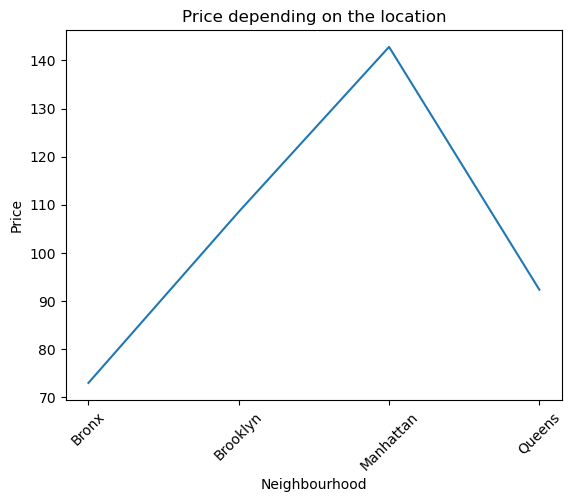

In [39]:
#Visualisation
#line plot- price as per neighbourhood groups
daily_vaccinations_year= data.groupby('neighbourhood_group')['price'].mean() 
print (daily_vaccinations_year)
plt.plot(daily_vaccinations_year.index, daily_vaccinations_year.values)
#groupby is a query, when you use a query you have to use index and values
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.title('Price depending on the location')
plt.xticks(rotation=45)
#tick signifies the gap between each numbers on the axis 
#and rotation will be the angle of the numbers
plt.show()

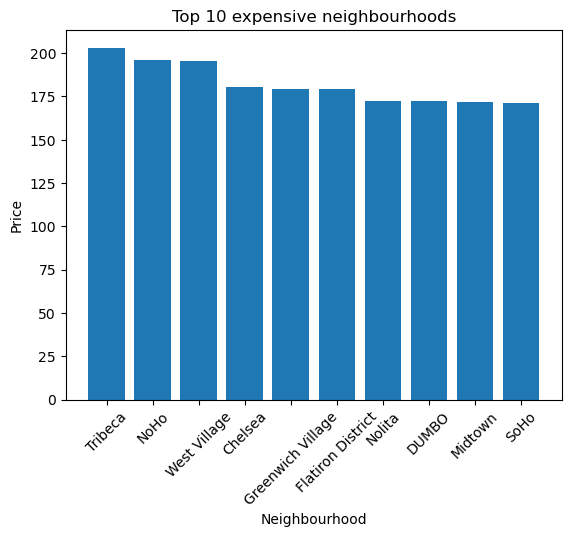

In [40]:
#Bar Plot- Top 10 expensive neighbourhoods
top_10_neighbourhoods= data.groupby('neighbourhood')['price'].mean().nlargest(10)
plt.bar(top_10_neighbourhoods.index, top_10_neighbourhoods.values)
#whatever you write first will be on x-axis and the second one, on y-axis
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.title('Top 10 expensive neighbourhoods')
plt.xticks(rotation=45)
plt.show()

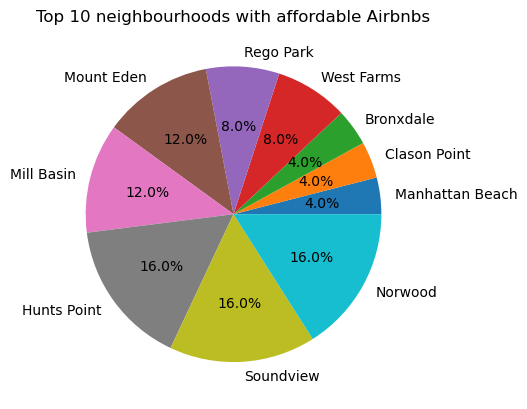

In [41]:
#Pie chart- Top 10 neighbourhoods with affordable airbnbs
top_10_neighbourhood= data['neighbourhood'].value_counts().nsmallest(10)
plt.pie(top_10_neighbourhood.values, labels=top_10_neighbourhood.index, autopct= '%1.1f%%')
plt.title('Top 10 neighbourhoods with affordable Airbnbs')
plt.show()

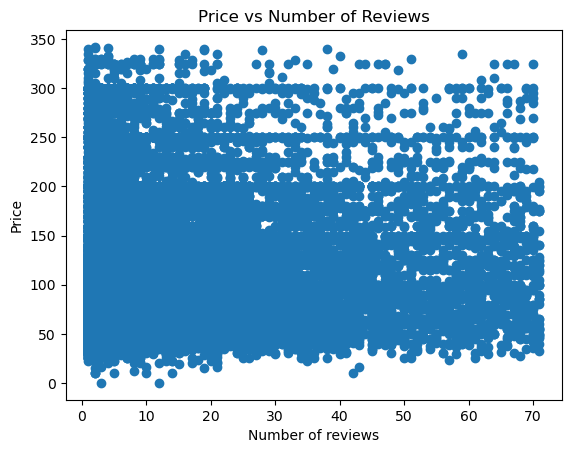

In [42]:
#Scatter Plot- Total vaccinations vs people fully vaccinated
plt.scatter(data['number_of_reviews'], data['price'])
plt.xlabel('Number of reviews')
plt.ylabel('Price')
plt.title('Price vs Number of Reviews')
plt.show()

In [43]:
#now we will cluster the neighbourhood based on longitudes and latitudes
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import confusion_matrix, accuracy_score

In [44]:
neighbourhood_1= data[["longitude", "latitude"]]
neighbourhood_1.head()

,longitude,latitude
1,-73.98377,40.75362
10,-73.96545,40.80316
20,-73.95718,40.71842
25,-73.97519,40.65599
41,-73.97966,40.66278


In [45]:
#perform k-means clustering
kmeans= KMeans(n_clusters=4, random_state=42)
kmeans.fit(neighbourhood_1) #(fit means test)
#Get the cluster labels and centroids
labels=data[["neighbourhood_group"]] #double [[]] because we have to treat it like a dataframe to make the confusion matrix
cluster_labels= kmeans.labels_
cluster_centers= kmeans.cluster_centers_
print (cluster_labels)
print(cluster_centers)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 3 0 ... 2 3 0]
[[-73.93240276  40.70447723]
 [-73.96877714  40.66604065]
 [-73.9869427   40.73646923]
 [-73.94333228  40.80314468]]


In [46]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
numeric_labels= label_encoder.fit_transform(labels)
print(numeric_labels)

[2 2 1 ... 2 2 1]


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
#creating a confusion matrix
confusion_mtx= confusion_matrix(numeric_labels, cluster_labels)
#calculate accuracy
accuracy= accuracy_score(numeric_labels, cluster_labels)
print (confusion_mtx)
print (accuracy*100)

[[   0    0    0  270]
 [5399 4469  450    0]
 [   0    0 5410 4172]
 [ 841    0   73  740]]
48.657441348973606


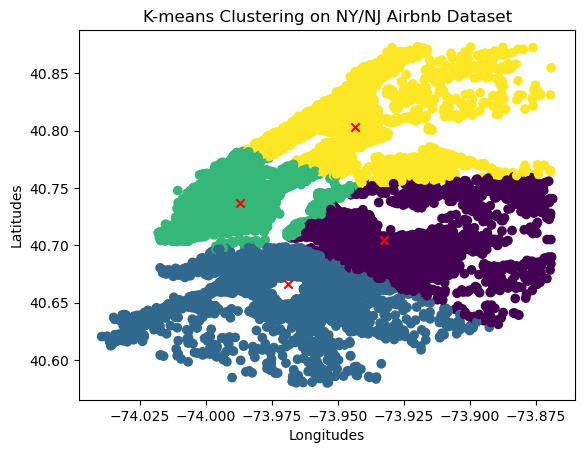

In [48]:
#Visualize the clusters
plt.scatter(data['longitude'],data['latitude'],c=cluster_labels)
plt.scatter(cluster_centers[:,0], cluster_centers[:,1],c='red', marker='x')
plt.xlabel('Longitudes')
plt.ylabel('Latitudes')
plt.title('K-means Clustering on NY/NJ Airbnb Dataset')
plt.show()